# <center> [Titanic](https://www.kaggle.com/c/titanic)
### <center>Predict survival on the Titanic and get familiar with ML basics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# Leer CSV

In [2]:
##### DOWNLOAD DATASET. ONLY IN COLAB !!!
#!wget -P ./../data/ https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/data/titanic_train.csv

In [31]:
df = pd.read_csv("../data/titanic_train.csv", index_col='PassengerId') 
test_df = pd.read_csv("../data/titanic_test.csv", index_col='PassengerId')

In [32]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [6]:
ProfileReport(df)

# Warnings:

- **Missings**
  - Cabin has 687 (77.1%) missing values
  - Age has 177 (19.9%) missing values
- **Zeros**
  - Parch has 678 (76.1%) zeros
  - SibSp has 608 (68.2%) zeros
  - Fare has 15 (1.7%) zeros
- **High cardinality**
  - Name has a high cardinality: 891 distinct values
  - Ticket has a high cardinality: 681 distinct values
  - Cabin has a high cardinality: 148 distinct values

# Qué queremos predecir? -> `df.Survived`

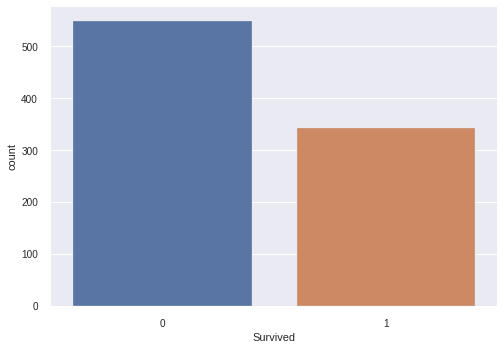

In [5]:
sns.countplot(df.Survived);

# Con que métrica se evalua? -> [Accucy](https://www.kaggle.com/c/titanic/overview/evaluation)

In [8]:
from sklearn.metrics import accuracy_score
pred = [0, 0, 1, 1]
true = [0, 1, 1, 1]
accuracy_score(true, pred)

0.75

# Consejo de Andrés: Elegir bien el conjunto de validación

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Modelo 1: Decission Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()
model1.fit(df.Pclass.values.reshape(-1, 1), df.Survived.values)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

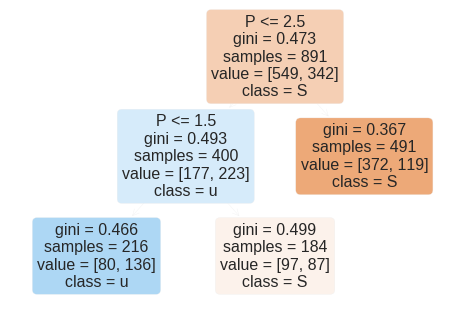

In [24]:
from sklearn import tree
tree.plot_tree(model1, feature_names="Pclass", class_names="Survived", filled=True, rounded=True);